In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
data = pd.read_csv("gender_classification_v7.csv")
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [123]:
data.shape

(5001, 8)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [125]:
data.dropna(axis= 0, inplace= True)

In [126]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [127]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [128]:
data.duplicated().sum()

1768

In [129]:
data.drop_duplicates(inplace= True)

In [130]:
data.shape

(3233, 8)

In [131]:
# number of happy and unhappy people
data["gender"].value_counts()

gender
Male      1783
Female    1450
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10088\220527421.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data= data, palette='magma')


<Axes: xlabel='gender', ylabel='count'>

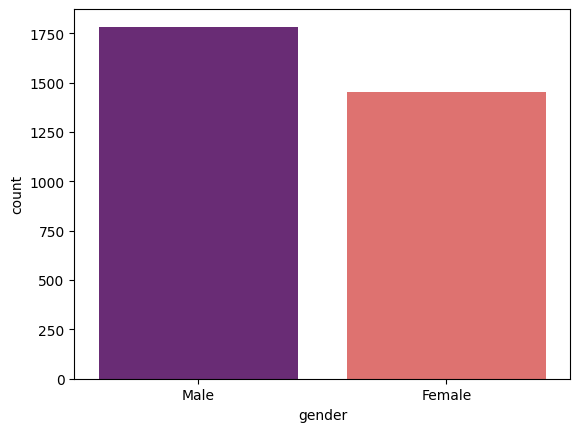

In [132]:
sns.countplot(x="gender", data= data, palette='magma')

In [133]:
# the difference beteween Male and Female in terms of data critics
data.groupby(["gender"]).mean()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,0.816552,12.816897,5.803379,0.170345,0.206207,0.189655,0.188276
Male,0.827257,13.542737,6.098317,0.833988,0.843522,0.822210,0.835670


<Figure size 1200x800 with 0 Axes>

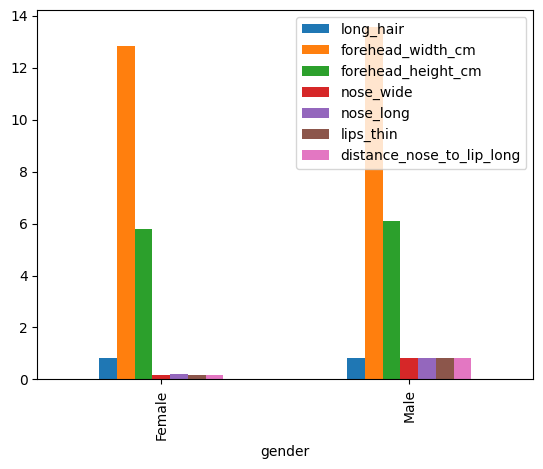

In [134]:
plt.figure(figsize= (12, 8))
data.groupby(["gender"]).mean().plot.bar()
plt.show()

In [135]:
x= data[data["gender"]=="Male"]

In [136]:
x.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male


In [137]:
y= data[data["gender"]=="Female"]
y.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
1,0,14.0,5.4,0,0,1,0,Female
4,1,13.5,5.9,0,0,0,0,Female
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [138]:
print(x.shape, y.shape)

(1783, 8) (1450, 8)


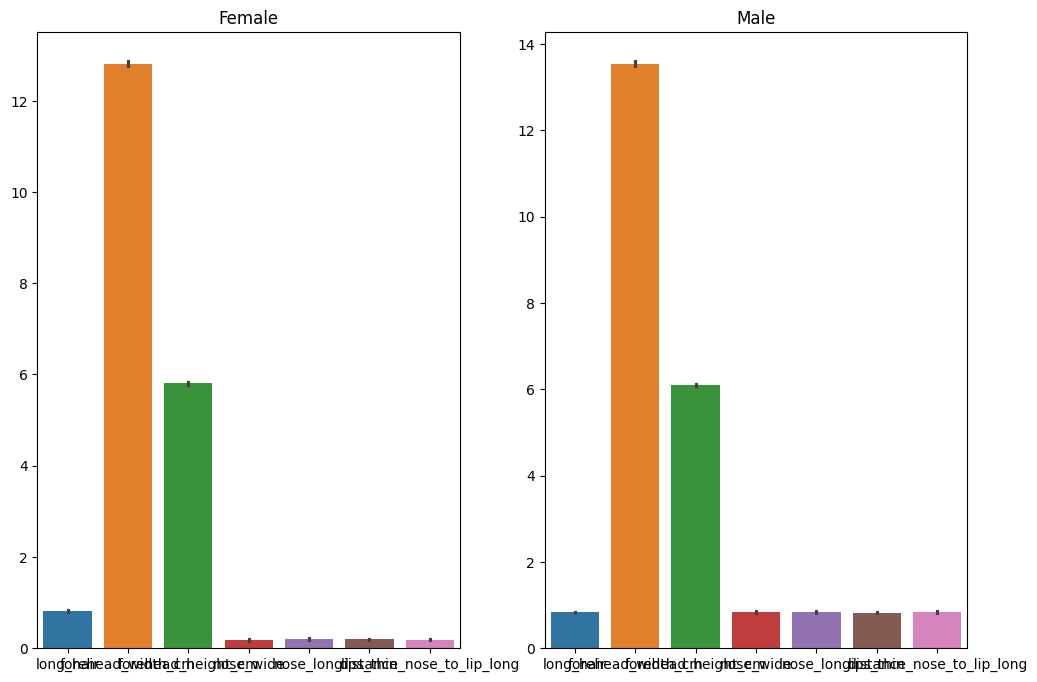

In [139]:
plt.figure(figsize= (12,8))
plt.subplot(1,2,1)
sns.barplot(data= y)
plt.title("Female")
plt.subplot(1,2,2)
sns.barplot(data= x)
plt.title("Male")
plt.show()

### split the data :

In [140]:
x= data[["long_hair", "forehead_width_cm", "forehead_height_cm", "nose_wide", "nose_long", "lips_thin", "distance_nose_to_lip_long"]]

In [141]:
y= data["gender"]

In [142]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3)

In [143]:
print(x_train.shape, x_test.shape)

(2263, 7) (970, 7)


In [144]:
print(y_train.shape, y_test.shape)

(2263,) (970,)


### SVM :

In [145]:
svc = SVC()

In [146]:
svc.fit(x_train, y_train)

SVC()

In [147]:
print(f"train score : {svc.score(x_train, y_train)}")
print(f"test score : {svc.score(x_test, y_test)}")

train score : 0.9611135660627486
test score : 0.9360824742268041


In [148]:
prediction = svc.predict(x_test)

In [149]:
print(confusion_matrix(y_test, prediction))

[[415  36]
 [ 26 493]]


In [150]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Female       0.94      0.92      0.93       451
        Male       0.93      0.95      0.94       519

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



there is an accuracy of 93% for Males and 94% for Females

In [151]:
svc_accuracy = accuracy_score(y_test, prediction)

In [152]:
print(f"the accuracy score with the test set is {svc_accuracy}")

the accuracy score with the test set is 0.9360824742268041


here we got 93% accuracy, but we can improve it

### using the gridsearchcv : 

In [153]:
param_grid = {"C": [0.1, 1, 10, 100, 1000],
              "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
              "kernel": ["rbf", "linear"]}

In [154]:
grid = GridSearchCV(SVC(), param_grid= param_grid, refit= True)

In [155]:
# fitting the modul with grid
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [156]:
# the best parameters after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [157]:
# how the modul looks after tuning
best_svc = grid.best_estimator_
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [158]:
grid_prediction = grid.predict(x_test)

In [159]:
# confusion_matrix and classification_report with gridsearchcv
print(confusion_matrix(y_test, grid_prediction))

[[433  18]
 [ 28 491]]


In [160]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

      Female       0.94      0.96      0.95       451
        Male       0.96      0.95      0.96       519

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



we have got almost 94% accuracy for Females and 96% accuracy for Males which it shows that after changing the parameters we had a better results

In [161]:
print(f"the accuracy score with test set for support vector machine after tuning : {grid_accuracy}")

the accuracy score with test set for support vector machine after tuning : 0.9577319587628866


In [162]:
# giving an exemple 
exemple= np.array([1, 15, 6, 1, 0, 1, 0]).reshape(1, -1)
print(f"for this exemple we'll have : {best_svc.predict(exemple)}")

for this exemple we'll have : ['Male']


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
